For this homework assignment, you are to submit a **single** ipynb file. Use the provided ipynb file to keep the same formatting for each question. In the ipynb file name, replace "NAME" with your first name. Unless otherwise specified, present your code as well as the output in your report. It is the student's responsibility to make sure the ipynb file runs when submitted. This assignment is worth 45 points.

# 1: Naive Bayes Classifiers *(13 points)*

Upload the SMSSpamCollection data set. Our goal is to use the Naive Bayes Classifiers algorithm to try and predict various text messages as either Spam or Ham. (I'm not sure why this data set claims that Non-Spam should be called Ham, but it does!)

In [ ]:
# You will need to replace "YOUR PATH" with the path to your csv file relative to where your ipynb file is saved
from google.colab import files
import pandas as pd
files.upload()
smsdata = pd.read_csv("SMSSpamCollection.csv")

Saving SMSSpamCollection.csv to SMSSpamCollection (2).csv


In [ ]:
smsdata

,Label,SMS
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home
5569,ham,Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like id ...


What we need to ensure first is that we have our SMS data all lower case. Change only that column to be all lowercase. *(1 point)*

In [ ]:
smsdata["SMS"]=smsdata["SMS"].str.lower()
smsdata

,Label,SMS
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


The following lines of code takes our data set and converts it into a matrix. Each column represents a unique word in our text messages. The rows represent each different text message. The value at each index is an **indicator** value, meaning the word appears or it does not. An indicator function is often called a Kronecker delta function.

$$ \mbox{word_matrix}[i,j] = \begin{cases}
1 & \mbox{ if word } j \mbox{ appears in SMS } i \\
0 & \mbox{ if word } j \mbox{ does not appear in SMS } i
\end{cases} $$

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
word_matrix = vectorizer.fit_transform(smsdata['SMS']).toarray()

word_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Now, we want to split our data into a training and test set: `word_matrix` has all of our inputs and our outputs are still stored in smsdata. *(2 points)*

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test)=train_test_split(word_matrix,smsdata["Label"])

Import the following function. First, set up the BernoulliNB model with the parameters `alpha=1` and `fit_prior=True`. Then fit the model using your training set. *(4 points)*

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bernofit=BernoulliNB(alpha=1, fit_prior=True).fit(X_train,Y_train)

Print out the predicted classes for each element in your testing set. *(2 points)*

In [ ]:
predsms=bernofit.predict(X_test)
print(predsms)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


Compute the simple accuracy of your model on the test set and display the confusion matrix (the first class is stored as "Ham", while the second is stored as "Spam"). How does the model perform on each class? *(4 points)*

In [ ]:
from sklearn.metrics import confusion_matrix
print(bernofit.score(X_test,Y_test))
cmsms=confusion_matrix(Y_test,predsms)
print(cmsms)
print("Accuracy of Ham:", (cmsms[0][0]/(cmsms[0][0]+cmsms[0][1]))*100)
print("Accuracy of Spam:", (cmsms[1][1]/(cmsms[1][0]+cmsms[1][1]))*100)

0.9691313711414213
[[1209    2]
 [  41  141]]
Accuracy of Ham: 99.83484723369116
Accuracy of Spam: 77.47252747252747


The model predicts Ham more accurately than Spam by roughly 22.35%.

# 2: Decision Trees *(17 points)*

In this next part, we will be running the Decision Tree algorithm to classify our iris data as either setosa, versicolor, or virginica. The following code loads iris into Python and focuses only on petal length and width.

Since we usually want to plot decision boundaries, we can only use two attributes/inputs in order to plot nicely. Ideally, in the real world we would want to use as many *necessary* features as possible.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
Y = iris.target

We next want to plot our data points, coloring them in different colors based on our classes. The first line produces setosa. Use that first line to complete the visualization along with a legend and labels (x = petal length, y=petal width). *(3 points)*

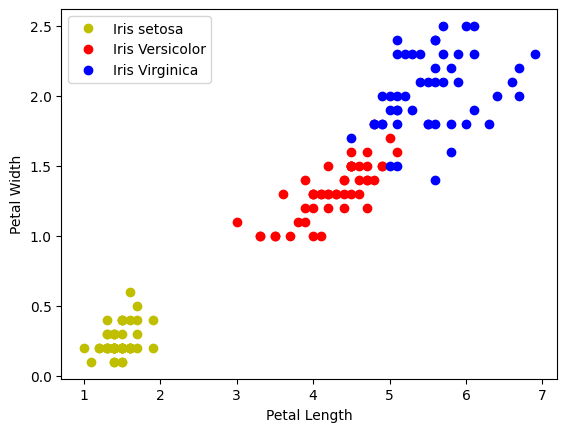

In [4]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "ro", label="Iris Versicolor")
plt.plot(X[:, 0][Y==2], X[:, 1][Y==2], "bo", label="Iris Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

To make our Decision Tree model, we will use the `DecisionTreeClassifier` function from the `tree` subpackage of `sklearn`. Import this function and split the data set into a training and test set.

When we set up the model, we will want to use the Gini impurity, so we need to set the `criterion` parameter to `gini`. Once you have set up the model, fit it using your training and testing set. *(4 points)*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
(X_traintree, X_testtree, Y_traintree, Y_testtree)=train_test_split(X,Y)
tree_clf=DecisionTreeClassifier(criterion="gini").fit(X_traintree,Y_traintree)

To visualize each step in our Decision Tree, you'll need to run the following code. You may want to comment out the last three lines first.

What this code does is it creates a `dot` file and saves it on your device (or Drive). Then the last three lines opens the `dot` file within Python to visualize the flow chart. You will need to know your path to the `dot` file. *(2 points)*

Saving tree.dot to tree (1).dot


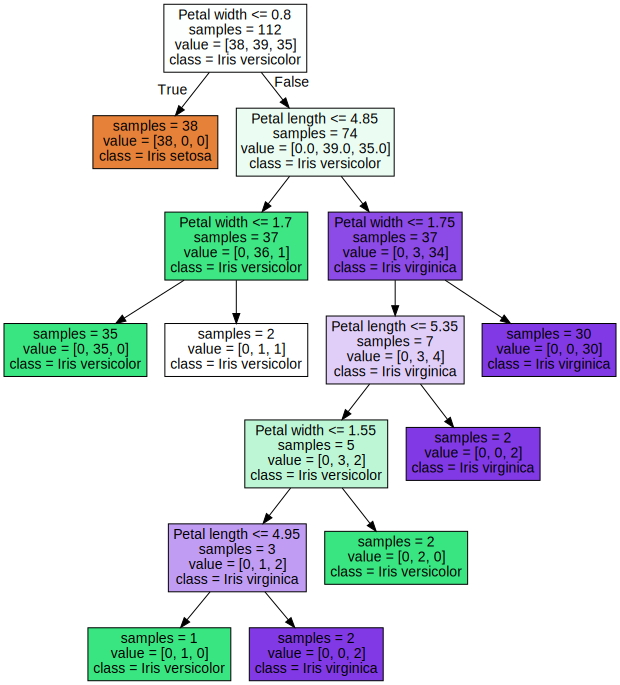

In [ ]:
#from sklearn.tree import export_graphviz
#export_graphviz(tree_clf, out_file="tree.dot", class_names=["Iris setosa", "Iris versicolor", "Iris virginica"],
#feature_names=["Petal length","Petal width"], impurity=False, filled=True)

import graphviz
from google.colab import files
# You will need to replace "YOUR PATH" with the path to your dot file relative to where your ipynb file is saved
files.upload()
with open("tree.dot") as f: dot_graph = f.read()
graphviz.Source(dot_graph)

Using the above diagram, determine the prediction classes of the following 3 input points. Do they match what Python gives us with the `predict` function? *(3 points)*

In [ ]:
new_points = np.array([[4,2],[6,1],[2,1]])
tree_clf.predict(new_points)

array([1, 2, 1])

Earlier, you plotted the data set. Let's see how your decision boundaries look. Copy the code down below to make the scatter plot again.

For decision boundary line 1: you need to interpret whether or not this is a horizontal (y=#) or a vertical line (x=#) separating the data points.

Suppose we wanted horizontal y=a. Then we want to make a plt.plot with [0,7] as the x-values and [a,a] as the y-values.

Create three more decision boundary lines (but remember that the next decision lines is only for the top or bottom and so it won't necessarily have a full domain/range). *(3 points)*

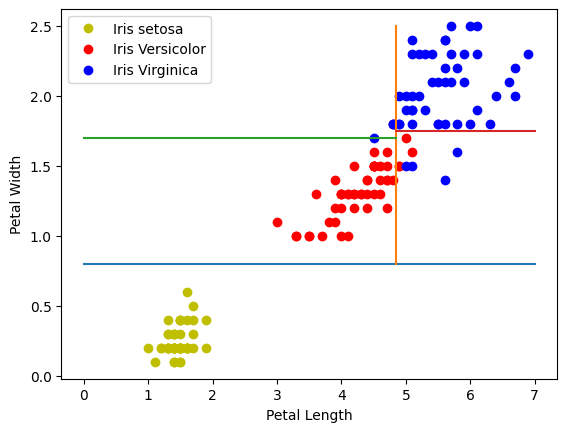

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "ro", label="Iris Versicolor")
plt.plot(X[:, 0][Y==2], X[:, 1][Y==2], "bo", label="Iris Virginica")
plt.plot([0,7],[0.8,0.8])
plt.plot([4.85,4.85],[0.8,2.5])
plt.plot([0,4.85],[1.7,1.7])
plt.plot([4.85,7],[1.75,1.75])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

Recall that we often want to ensemble our algorithms. In this case, we want to make several decision trees and combine them together (random forest). Below, we have set up a random forest to have 500 decision trees made where each tree can only have 10 leaf nodes. Fit the model to the training set. Compare the prediction values of the test set with the ground truth values. *(2 points)*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=10)
forest_clf.fit(X_traintree,Y_traintree)

predtree=forest_clf.predict(X_testtree)
cmtree=confusion_matrix(Y_testtree,predtree)

print(cmtree)

[[12  0  0]
 [ 0 11  0]
 [ 0  1 14]]


# 3: Support Vector Machines *(15 points)*

In this problem, we will use the iris data set to now make classifications using support vector machines. Only using the petal length and width. Run the following command to determine what this is doing (think about the process of a support vector machine and why we might want to do this). *(2 points)*

In [14]:
X = iris.data[:, 2:] # petal length and width
Y = iris.target
versicolor_or_virginica = (Y == 1) | (Y == 2)
A = X[versicolor_or_virginica]
B = Y[versicolor_or_virginica]

The code is making a input arrays and output arrays of inputs and targets labeled as versicolor or virginica.

Import the `SVC` function from the `svm` subpackage of the `sklearn` package. Split `A` and `B` into a training and test set. Model the support vector machine setting the `kernel` parameter to the string "linear" and fit the model using the training set. *(4 points)*

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
(X_trainA, X_testA, Y_trainB, Y_testB)=train_test_split(A,B)
suptrains=SVC(kernel="linear").fit(X_trainA,Y_trainB)


What is the (simple) accuracy? *(1 point)*

In [16]:
print(suptrains.score(X_testA,Y_testB))


0.84


Similar to the linear models, `.coef_` provides the coefficients of the SVM, `.intercept_` provides the intercept of the SVM, and `.support_vectors_` returns a list of the support vectors. Print each of these values. *(3 points)*

In [17]:
m=suptrains.coef_
print(m)
b=suptrains.intercept_
print(b)
svs=suptrains.support_vectors_
print(svs)

[[1.46341332 2.82926666]]
[-11.97559802]
[[4.9 1.5]
 [5.1 1.6]
 [4.5 1.6]
 [4.8 1.4]
 [4.7 1.5]
 [5.  1.7]
 [4.9 1.5]
 [4.7 1.6]
 [4.6 1.5]
 [4.9 1.8]
 [5.1 1.9]
 [5.1 1.8]
 [5.1 1.9]
 [4.9 2. ]
 [4.8 1.8]
 [4.9 1.8]
 [5.  2. ]
 [5.  1.9]]


Our decision boundary is the dot product of the coefficients with the x-values plus the intercept. It is calculated below where `m` is supposed to be your coefficient vector and `b` is supposed to be your intercept.

Make a plot of the versicolor and setosa data points along with your decision boundary. Then include the following scatterplot command to view your support vectors (stored as `svs`). *(3 points)*

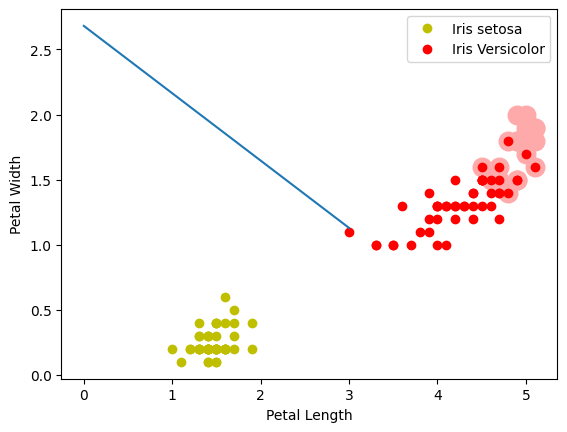

In [18]:
decision_boundary = -m[0][0]/m[0][1] * range(3,7) - b/m[0][1]

plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "ro", label="Iris Versicolor")
plt.plot(decision_boundary)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')

Recreate the SVM model, but this time use the kernel as `poly` instead of `linear`. This creates a polynomial boundary line instead of just a line. Did the accuracy improve? *(2 points)*

In [19]:
suppoly=SVC(kernel="poly").fit(X_trainA,Y_trainB)
print(suppoly.score(X_testA,Y_testB))


0.8


The accuracy decreased by 0.04.